# Section 3: EDA and Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Seaborn Configuration from Section 1

> Using the code from Section 1 in the cell below to configure Seaborn and set my prefered theme. 

In [2]:
sns.set_theme(style="ticks",
              font_scale=1.3, 
             )

plt.rc("axes.spines", top=False, right=False)

#### Loading Dataset from Section 2 

In [3]:
df=pd. read_csv("task2.csv")
df


df.drop('Weighted_Score', axis='columns')

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45.0,49.0,49.0,65.0,65.0,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60.0,62.0,63.0,80.0,80.0,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80.0,82.0,83.0,100.0,100.0,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100.0,123.0,122.0,120.0,80,1,False
4,4,4,Charmander,Fire,NaN,309,39.0,52.0,43.0,60.0,50.0,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,600,50.0,100.0,150.0,100.0,150.0,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,700,50.0,160.0,110.0,160.0,110.0,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,600,80.0,110.0,60.0,150.0,130.0,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,680,80.0,160.0,60.0,170.0,130.0,80,6,True


## Task 3: Exploratory Data Analysis through Visualization

### 3.1. Data Analysis and Visualizations

#### 3.1.1. To answer the research questions, I will first wrangle the data to return the mean Weighted_Score, split by the Pokemon Type 1. 


In [11]:
df1 = (df.groupby('Type 1')['Weighted_Score'].mean().sort_values(ascending=False).to_frame().reset_index())

df1


,Type 1,Weighted_Score
0,Dragon,95.728125
1,Steel,93.562963
2,Rock,86.047727
3,Ground,84.900000
4,Fighting,79.066667
5,Dark,77.400000
6,Flying,75.775000
7,Fire,75.663462
8,Ghost,73.190625
9,Water,72.553571


In [22]:
df2 = (df.groupby('Type 2')['Weighted_Score'].mean().sort_values(ascending=False).to_frame().reset_index())

df2

,Type 2,Weighted_Score
0,Fighting,94.519231
1,Ice,90.357143
2,Rock,88.871429
3,Dragon,88.383333
4,Dark,88.180000
5,Steel,87.290909
6,Ground,83.948571
7,Fire,78.766667
8,Psychic,77.378788
9,Bug,76.833333


#### 3.1.2. Violin plot showing the distribution of Weighted_Scores split by all the Pokémon types (Type 1). 

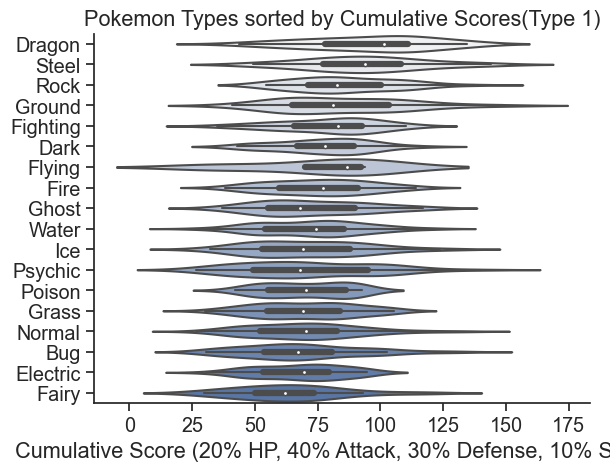

In [35]:
fig, ax = plt.subplots()
sns.violinplot(data=df, y = 'Type 1', x = 'Weighted_Score',scale='width',order = df1['Type 1'].tolist(), palette = ("light:b"),color='gray')

plt.ylabel('')
plt.xlabel('Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)')
plt.title('Pokemon Types sorted by Cumulative Scores(Type 1)')
sns.despine()


#### 3.1.3. Horizontal Bar Chart 

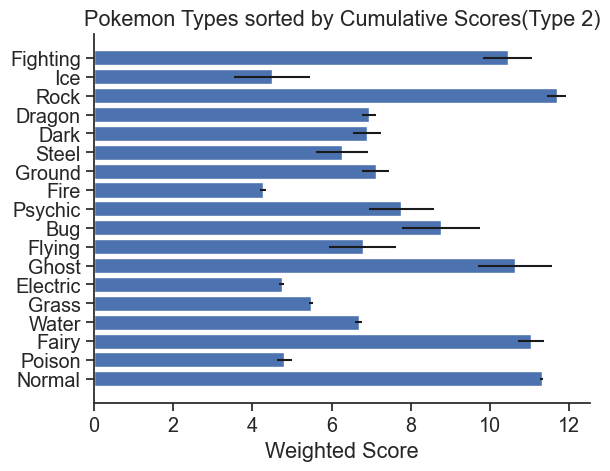

In [33]:
fig, ax = plt.subplots()

# Example data
people = (df2['Type 2'])
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Weighted Score')
ax.set_title('Pokemon Types sorted by Cumulative Scores(Type 2)')

plt.show()

#### 3.1.4. Histogram 

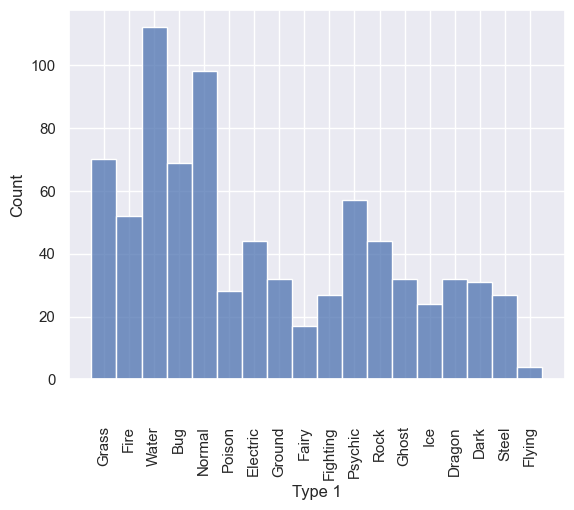

In [101]:
ax=sns.histplot(df['Type 1'], kde=False, );

ax.tick_params(axis='x', rotation=90,size=30)

#### 3.1.5. Hexbin plot with marginal distributions

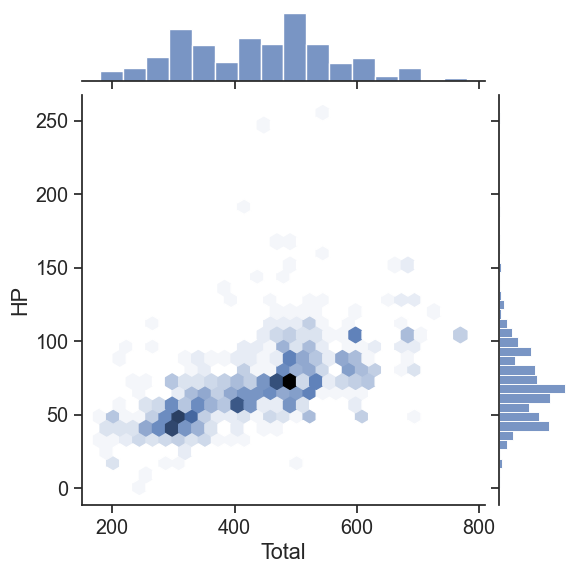

In [42]:
sns.jointplot(data=df, x='Total', y='HP', kind='hex')

#### 3.1.6. PairPlot of the quantiative features of the pokémon dataset 

Text(0.5, 0.98, 'Relationship between Pokémon Skill Attributes')

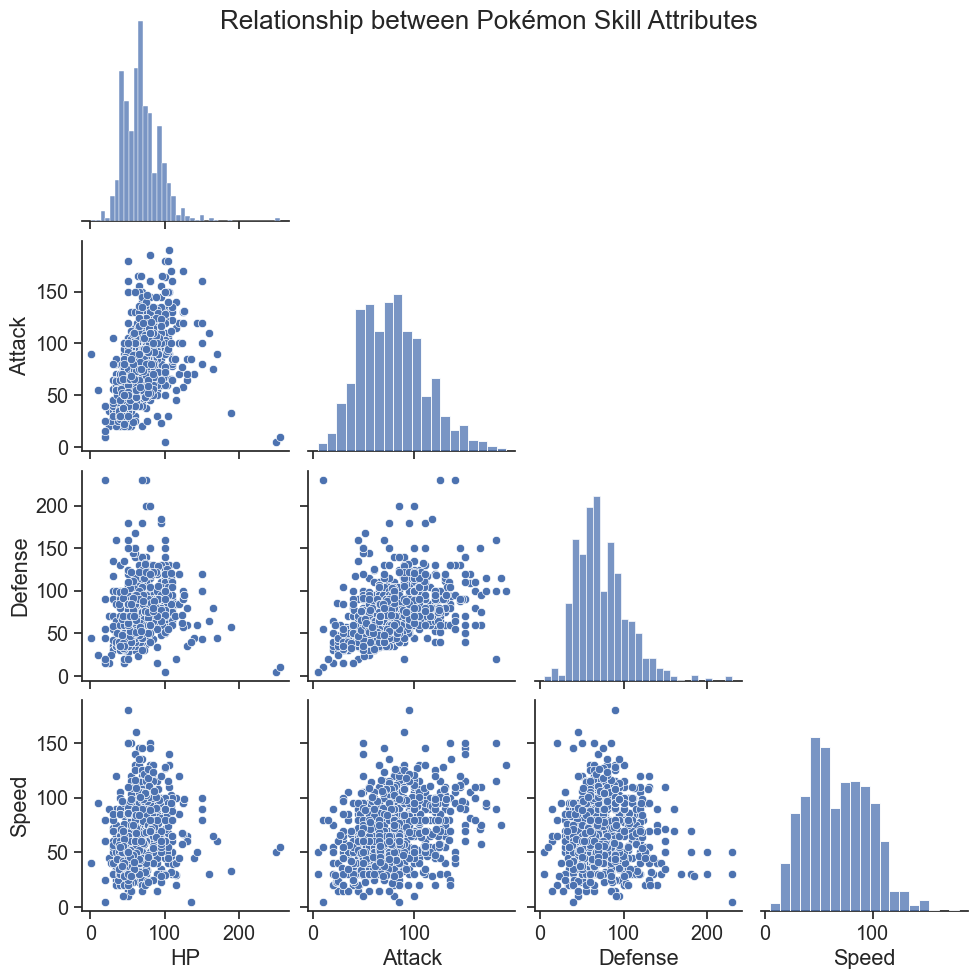

In [8]:
pp = sns.pairplot(data=df.select_dtypes(include='number').drop('Unnamed: 0',axis=1).drop('#',axis=1).drop('Total',axis=1).drop('Generation',axis=1).drop('Weighted_Score',axis=1).drop('Sp. Atk',axis=1).drop('Sp. Def',axis=1),
                 corner=True)

pp.fig.suptitle('Relationship between Pokémon Skill Attributes')

### 3.2. Summary and conclusions

#### 3.2.1. Summarizing my findings and describing conclusions and insights that I was able to draw from my visualizations. 


## Research Question 1: Which Pokemon Types are the best, as determined by the Weighted Score?

According to weighted scores, the violin plot shows that Dragon followed by Steel Pokemon are the the best type 1 Pokemons on average due to their high mean values. The best Type 2 Pokemon on the other hand is the Rock species according to the horizontal bar chart. However, Ground Pokemon followed by Steel have the highest weighted score maximums for Type 1 Pokemons and Rock and Ghost have the highest for Type 2. This shows that most Dragon Type 1  Pokemon and Rock Type 2 Pokemon will be the best on average. However,the very best Pokemon with the highest weighted score will only be found amongst Ground Type 1 Pokemon and Rock Type 2 Pokemon.

## Research Question 2: Is there a correlation between the rarity of a pokemon and their quality?

My findings have shown me that there is no connection between the rarity of a Pokemon and their qualtity as determined by weighted score. The histogram showcasing the frequency of Type 1 Pokemons shows that the most populous Pokemon is the Water species, and the least populous species of Pokemon is the Flying Pokemon.Although Flying Pokemon are the least prevolent, they are not in the top 5 of Pokemons with the highest weighted score. Water Pokemon may be the most abundant but they do not have the lowest weighted score. Therefore it seems that rarity of a pokemon is not linked to their perceived quality. With this being said, the Pokemons with the highest weighted score are significantly fewer than the ones with low weighted scores.

## Research Question 3: What influences a Pokemons HP level more? Attack or Defense?

I wanted to determine whether attack or defense was more important in determining the HP of a Pokemon. I first started by looking at the relationship between HP and Total stats which include both attack and defense. The Hexbin plot showed that there is a positive correlation between HP and Total. After this, I used a PairPlot to dive in deeper and focus more on attack and defense. The graphs show that there is a positve correlation between attack and defense but there is no relationship between Defense and HP. However, there is a postive correlation between Attack and HP. Furthermore, the correlation is much stronger than the one between attack and defense. This has lead me to deduce that Attack is more influential and valuable to HP than compared to Defense.